# Part 1: Digit recognition using CNNs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize input data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to add channel dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),

    layers.Conv2D(96, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(96, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1)),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 96)     │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,735,658 (239.32 MB)

 Trainable params: 62,734,250 (239.31 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [3]:
# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_cat,
                    epochs=5,
                    batch_size=128,
                     validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 81ms/step - accuracy: 0.5791 - loss: 1.7426 - val_accuracy: 0.8817 - val_loss: 0.4261
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9705 - loss: 0.1109 - val_accuracy: 0.9802 - val_loss: 0.0751
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9756 - loss: 0.0907 - val_accuracy: 0.9852 - val_loss: 0.0523
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9832 - loss: 0.0657 - val_accuracy: 0.9703 - val_loss: 0.1150
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9812 - loss: 0.0754 - val_accuracy: 0.9865 - val_loss: 0.0538


Test accuracy: 0.9864


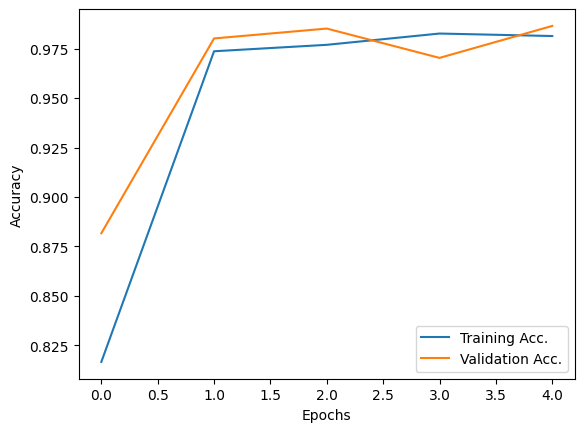

In [4]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Acc.')
plt.plot(history.history['val_accuracy'], label='Validation Acc.')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [5]:
model.save('mnist_cnn_model.keras')

 # Part 2: Input optimization for a CNN

In [6]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

model = load_model('mnist_cnn_model.keras')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def optimize_with_snapshots(model, target_output, img, steps=500, lr=0.05, snapshot_interval=100):
    optimized_img = tf.Variable(img, trainable=True)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    loss_fn = tf.keras.losses.CategoricalCrossentropy()

    snapshots = [(0, img.copy().squeeze(), None)]  # Initial image, no loss yet

    for i in range(1, steps + 1):
        with tf.GradientTape() as tape:
            output = model(optimized_img)
            loss = loss_fn(target_output, output)
            reg_loss = tf.reduce_sum(tf.square(optimized_img))
            total_loss = loss + 1e-4 * reg_loss

        grads = tape.gradient(total_loss, optimized_img)
        optimizer.apply_gradients([(grads, optimized_img)])
        optimized_img.assign(tf.clip_by_value(optimized_img, 0.0, 1.0))

        if i % snapshot_interval == 0 or i == steps:
            snapshots.append((i, optimized_img.numpy().squeeze(), total_loss.numpy()))

    return snapshots


def plot_snapshots(snapshots, main_title=None):
    n = len(snapshots)
    plt.figure(figsize=(2 * n, 3))

    for idx, (step, img, loss) in enumerate(snapshots):
        plt.subplot(1, n, idx + 1)
        plt.imshow(img, cmap='gray')
        title = f"Step {step}"
        if loss is not None:
            title += f"\nLoss: {loss:.4f}"
        plt.title(title)
        plt.axis('off')

    if main_title:
        plt.suptitle(main_title, fontsize=16)
        plt.subplots_adjust(top=0.8)  # Ensure space for the title

    plt.tight_layout()
    plt.show()

In [8]:
def create_target_output(digits, weights=None):
    target_output = np.zeros((1, 10), dtype=np.float32)

    if isinstance(digits, int):
        target_output[0, digits] = 1.0
    else:
        if weights is None:
            weights = [1.0 / len(digits)] * len(digits)
        for d, w in zip(digits, weights):
            target_output[0, d] = w

    return target_output

def create_random_gray_image():
    return np.random.rand(28, 28, 1).reshape(1, 28, 28, 1).astype(np.float32)

def sample_random_image_from_dataset(x_train, y_train, target_digit, seed=0, add_noise=False, noise_scale=0.3):
    np.random.seed(seed)
    indices = np.where(y_train == target_digit)[0]
    random_index = np.random.choice(indices)
    image = x_train[random_index].reshape(1, 28, 28, 1).astype(np.float32)

    if add_noise:
        noise = noise_scale * np.random.randn(*image.shape)
        image += noise
        image = np.clip(image, 0.0, 1.0)

    return image

In [9]:
def optimize_input_image(model,
                         digits,
                         sample_from_dataset=False,
                         x=None,
                         y=None,
                         steps=500,
                         lr=0.05,
                         noise_scale=0.3,
                         seed=0,
                         snapshot_interval=100,
                         plot=True):

    # Create target output vector
    target_output = create_target_output(digits)

    # Handle image initialization
    if not sample_from_dataset:
        initial_img = create_random_gray_image()
    else:
        assert x is not None and y is not None, "x and y must be provided when sampling from dataset."
        initial_img = sample_random_image_from_dataset(
            x_train=x,
            y_train=y,
            target_digit=digits,
            seed=seed,
            add_noise=True,
            noise_scale=noise_scale)

    # Optimize
    snapshots = optimize_with_snapshots(
        model=model,
        target_output=target_output,
        img=initial_img,
        steps=steps,
        lr=lr,
        snapshot_interval=snapshot_interval
    )

    if plot:
        plot_snapshots(snapshots, main_title=f"Optimization Toward Digits {digits}")

    return snapshots

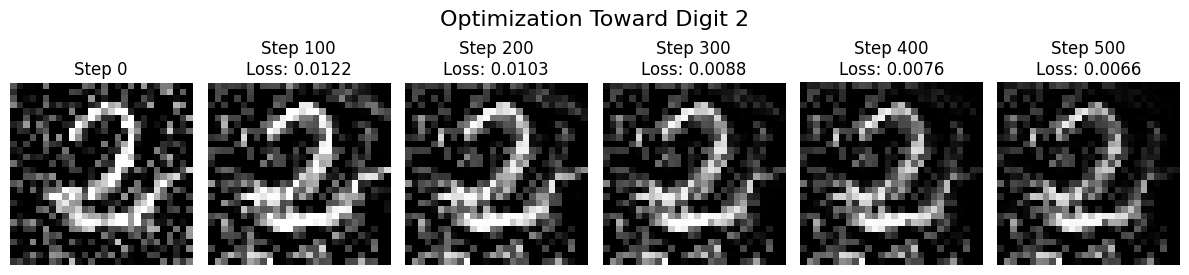

In [52]:
# Prepare target output and initial image
target_digit = 2
target_output = create_target_output(digits=target_digit)

# Get real image with added noise
initial_img = sample_random_image_from_dataset(x_train, y_train, target_digit=target_digit, add_noise=True)

# Run optimization
snapshots = optimize_with_snapshots(model, target_output, initial_img, steps=500, snapshot_interval=100)

# Plot snapshots
plot_snapshots(snapshots, main_title=f"Optimization Toward Digit {target_digit}")

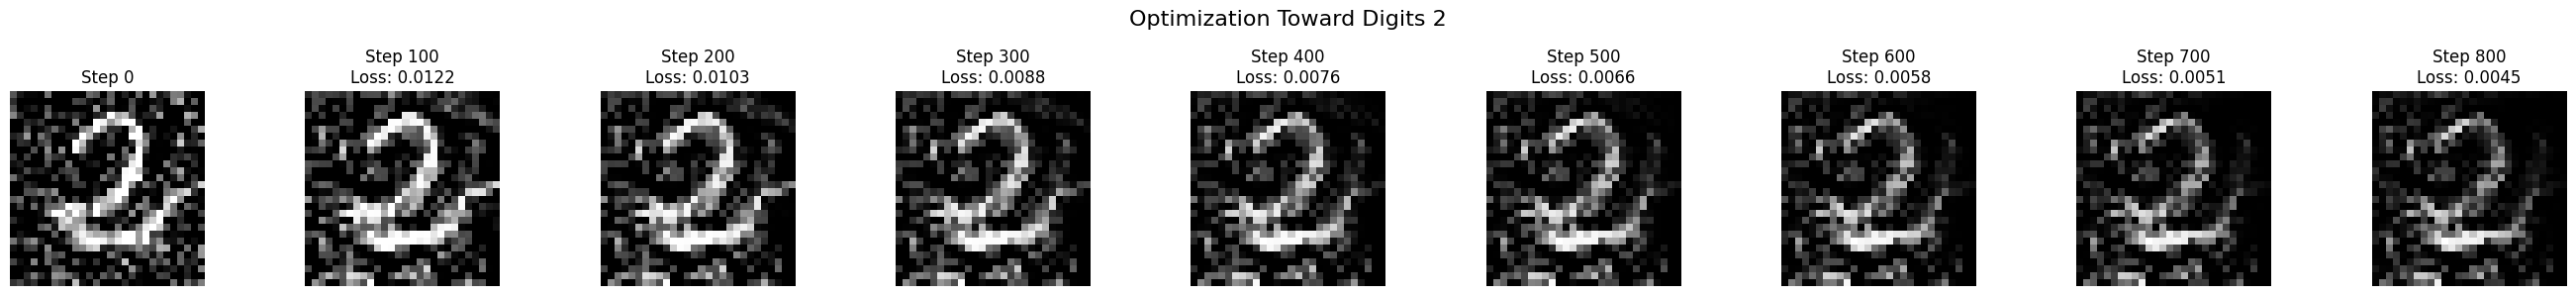

In [40]:
_ = optimize_input_image(model,
                         digits=2,
                         sample_from_dataset=True,
                         x=x_train,
                         y=y_train)

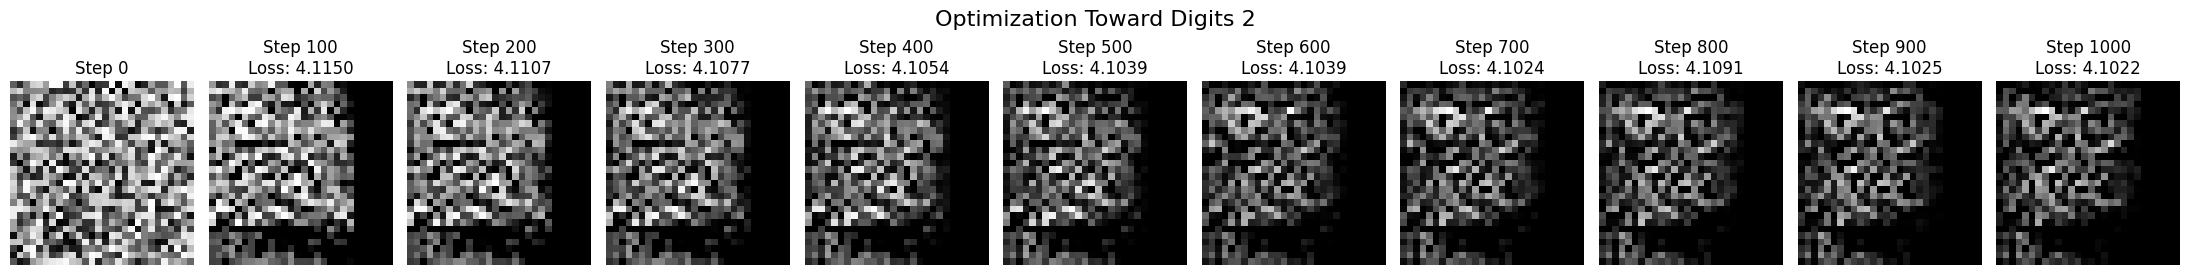

In [49]:
_ = optimize_input_image(model,
                         digits=2,
                         steps=1000,
                         sample_from_dataset=False)

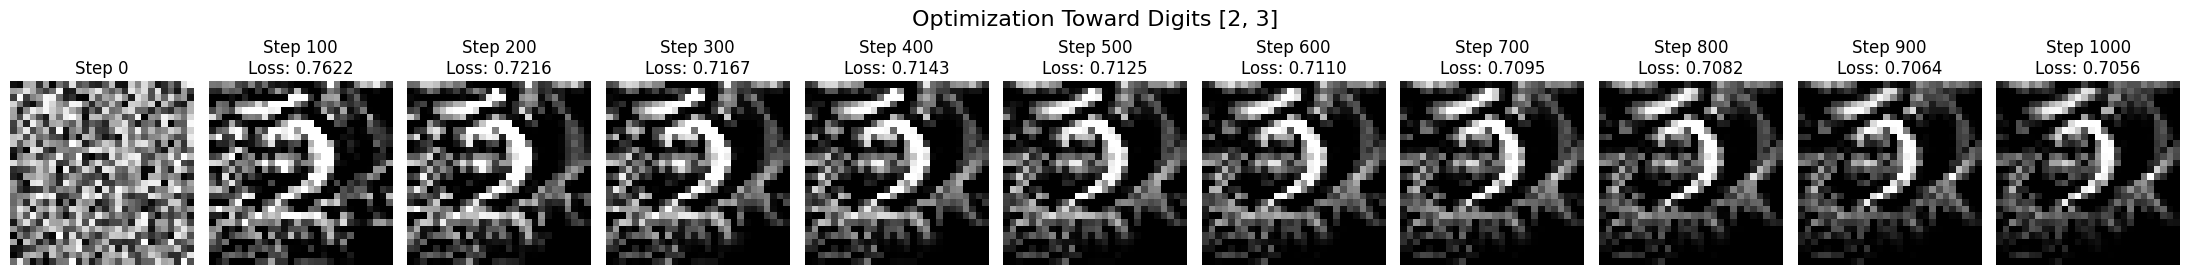

In [50]:
_ = optimize_input_image(model,
                         digits=[2,3],
                         steps=1000,
                         sample_from_dataset=False)

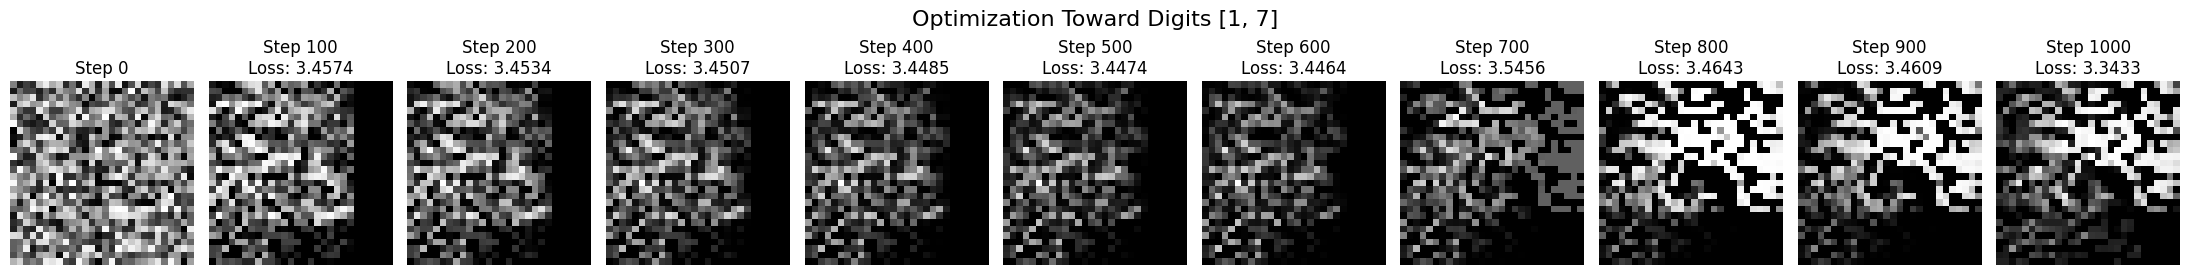

In [51]:
_ = optimize_input_image(model,
                         digits=[1,7],
                         steps=1000,
                         sample_from_dataset=False)

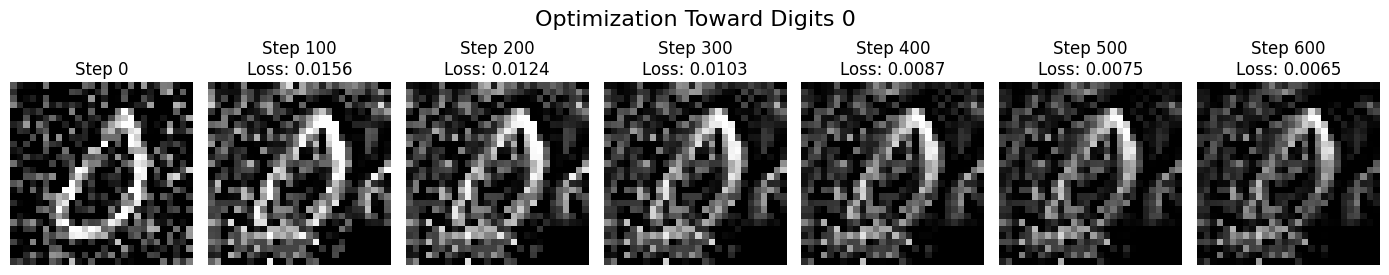

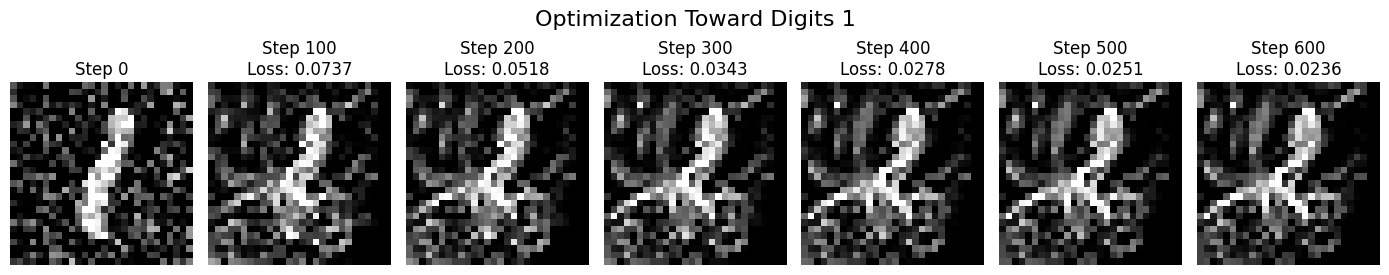

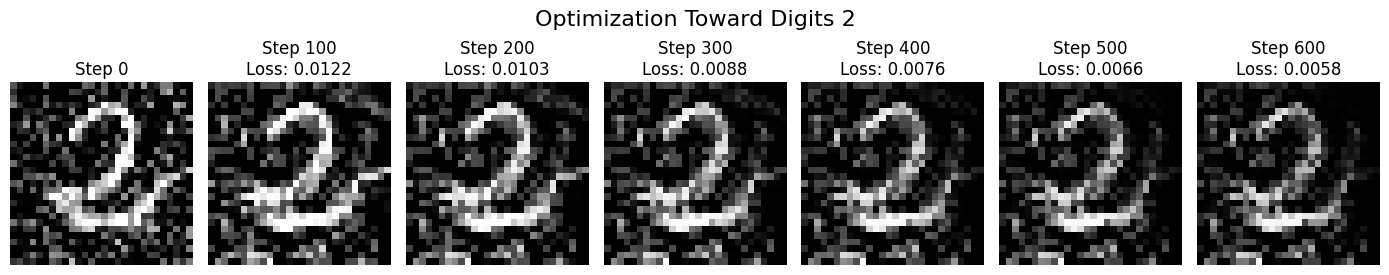

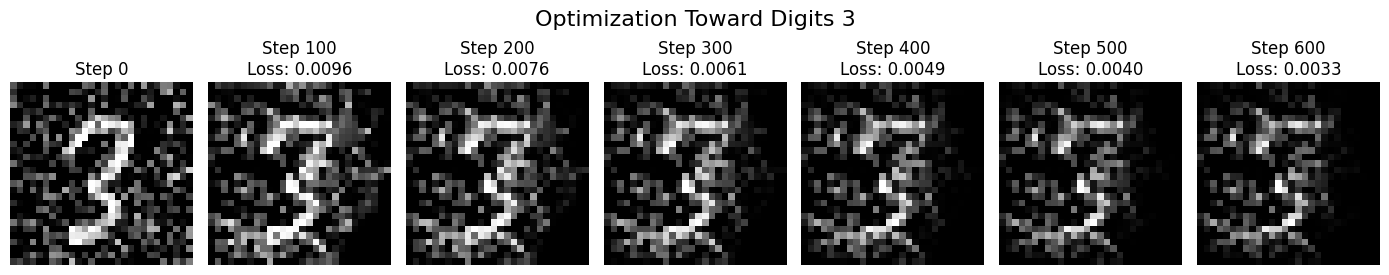

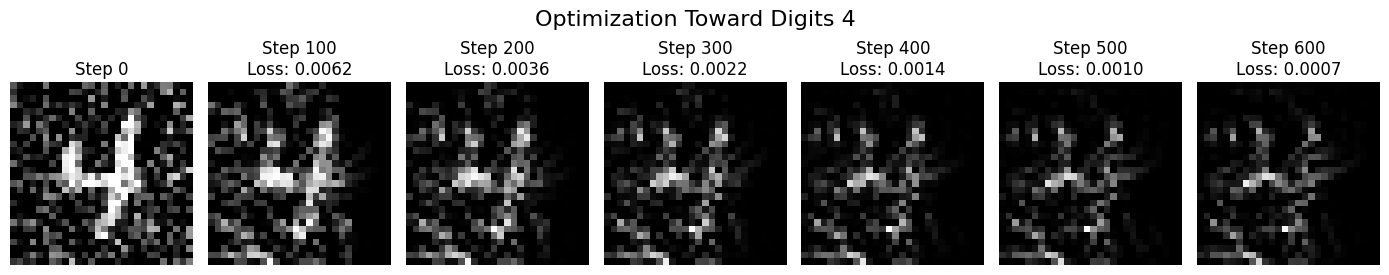

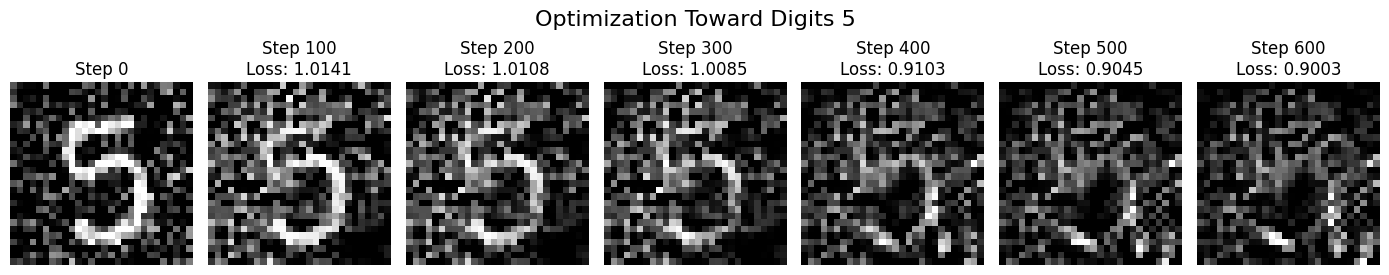

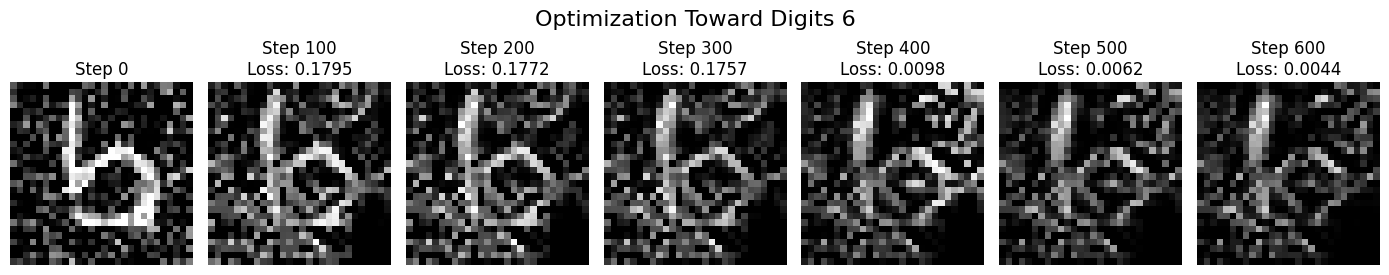

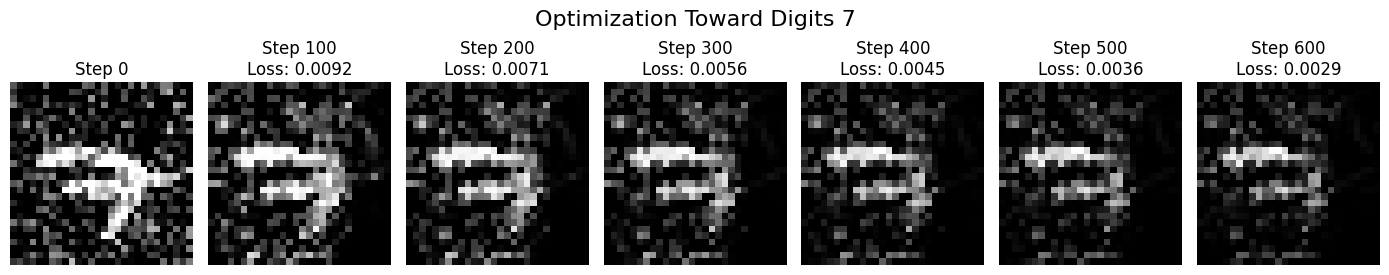

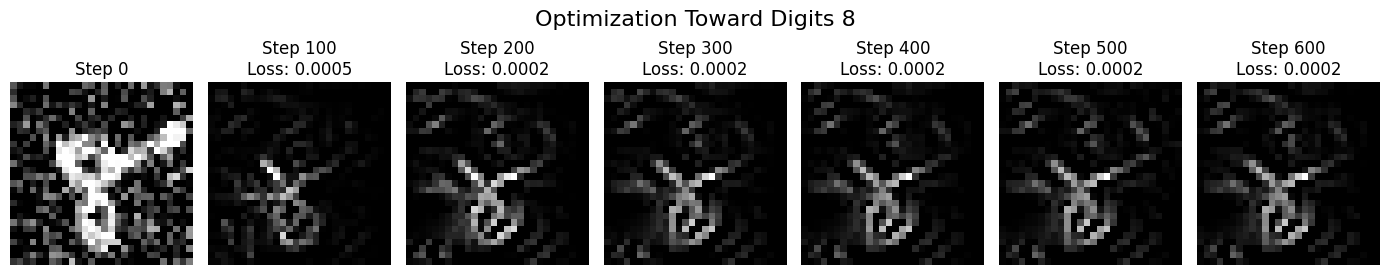

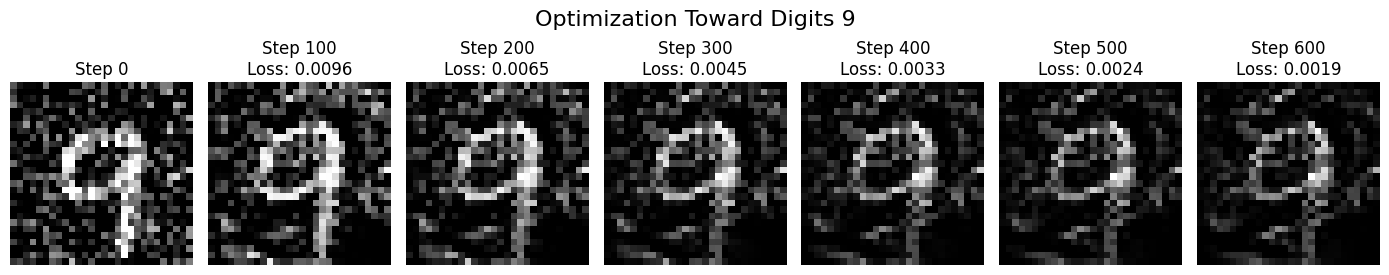

In [55]:
for digit in range(10):
    _ = optimize_input_image(model,
                             digits=digit,
                             sample_from_dataset=True,
                             steps=600,
                             x=x_train,
                             y=y_train)

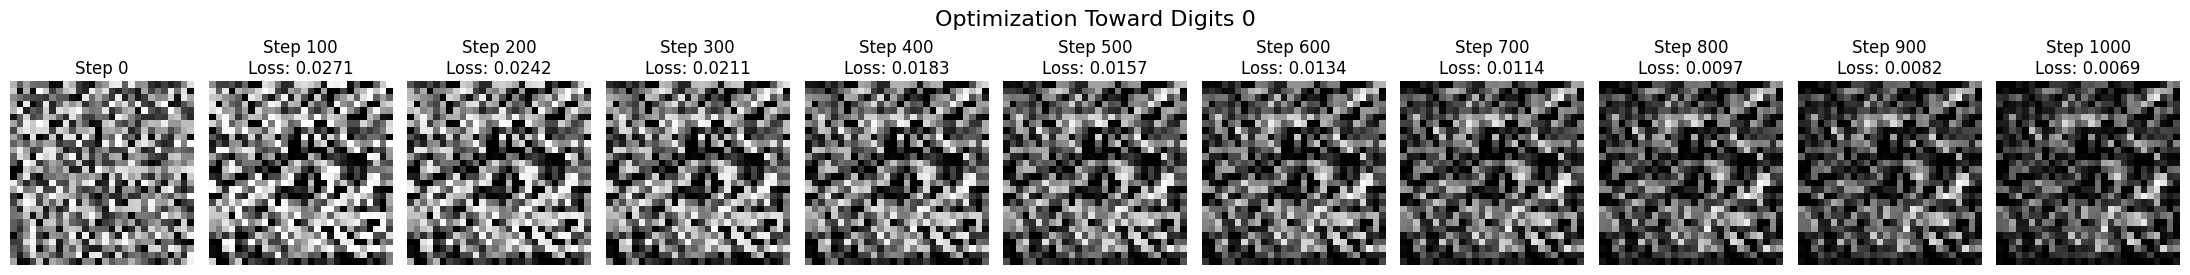

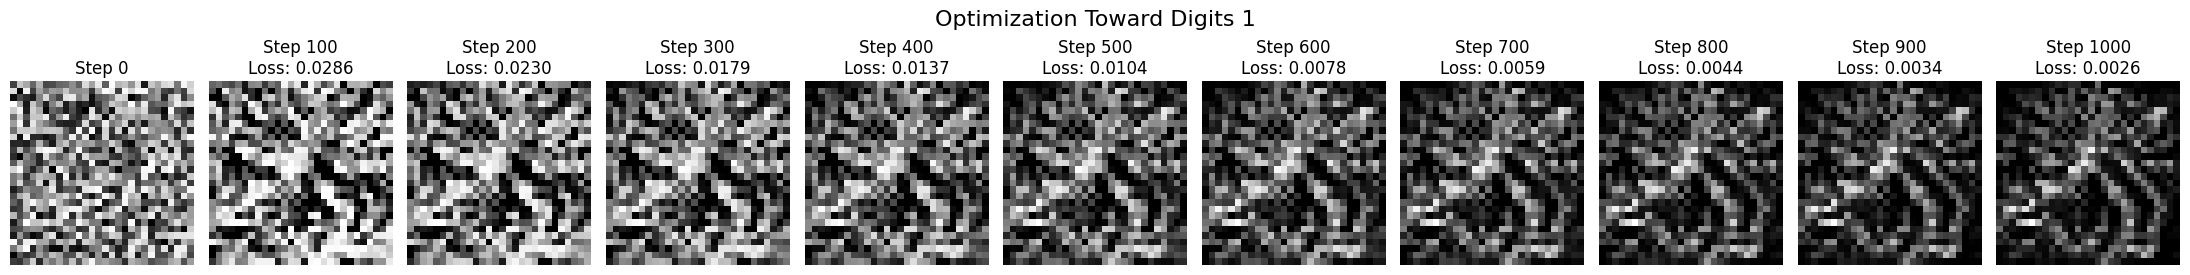

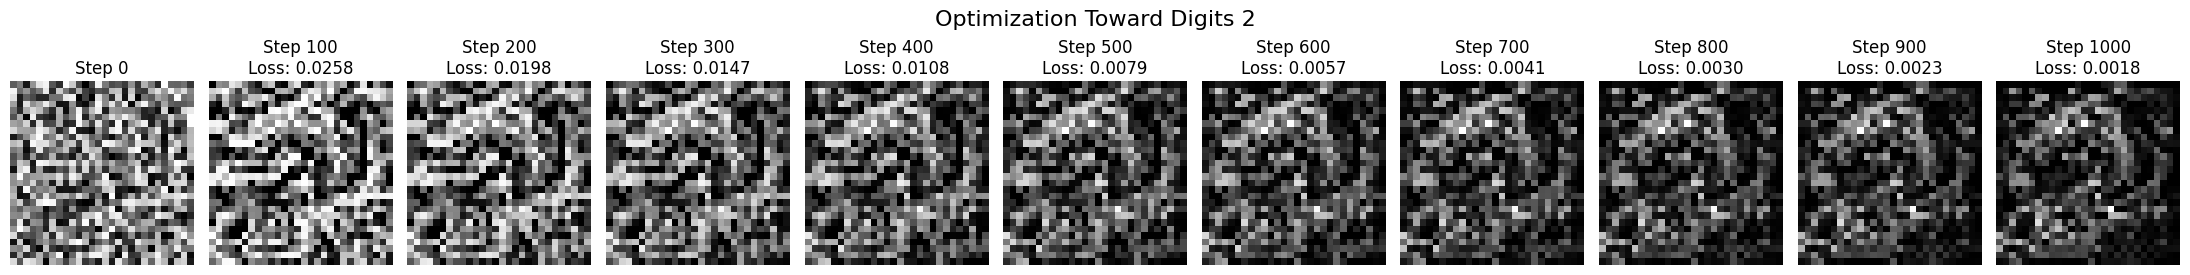

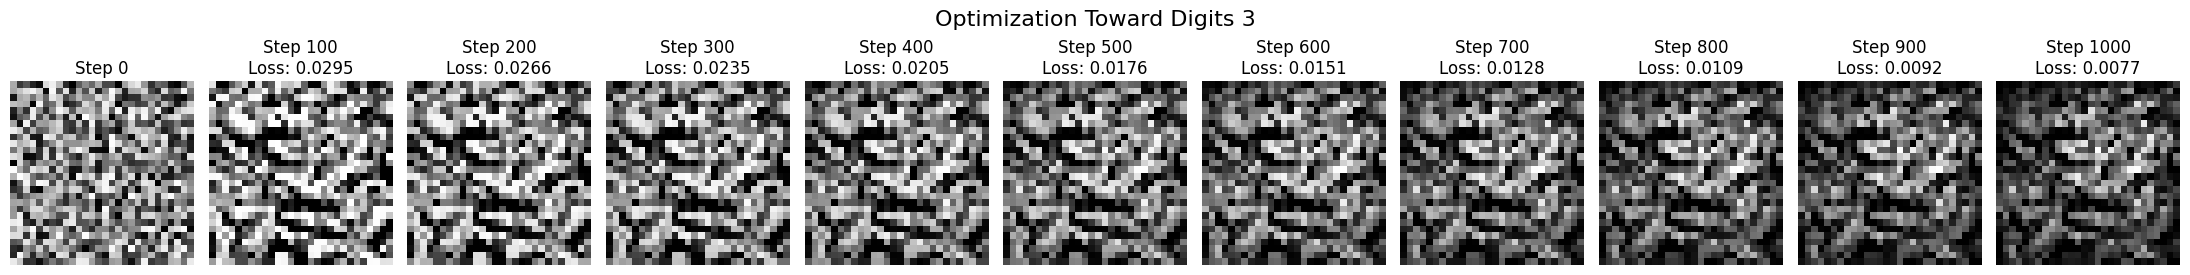

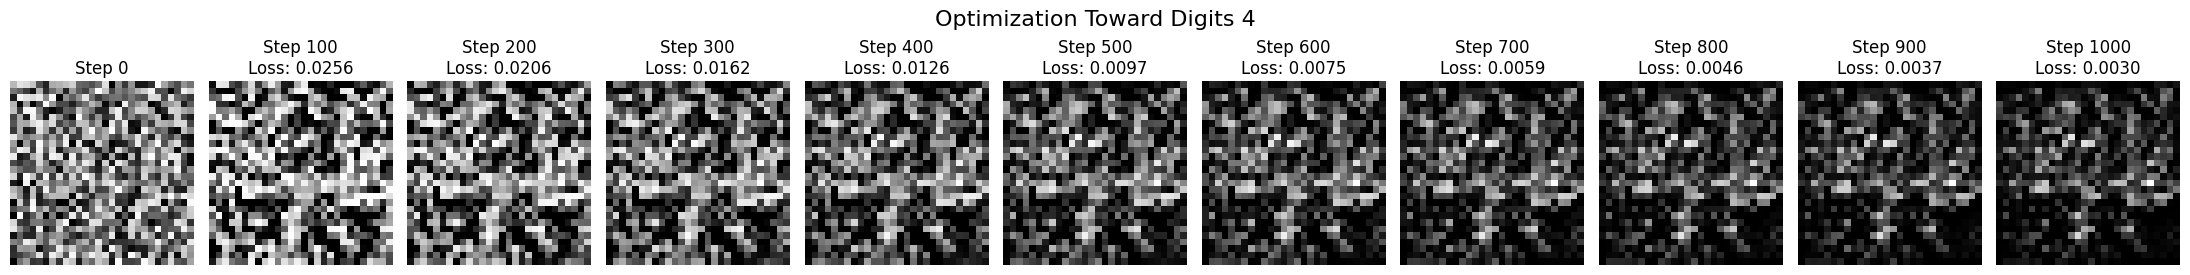

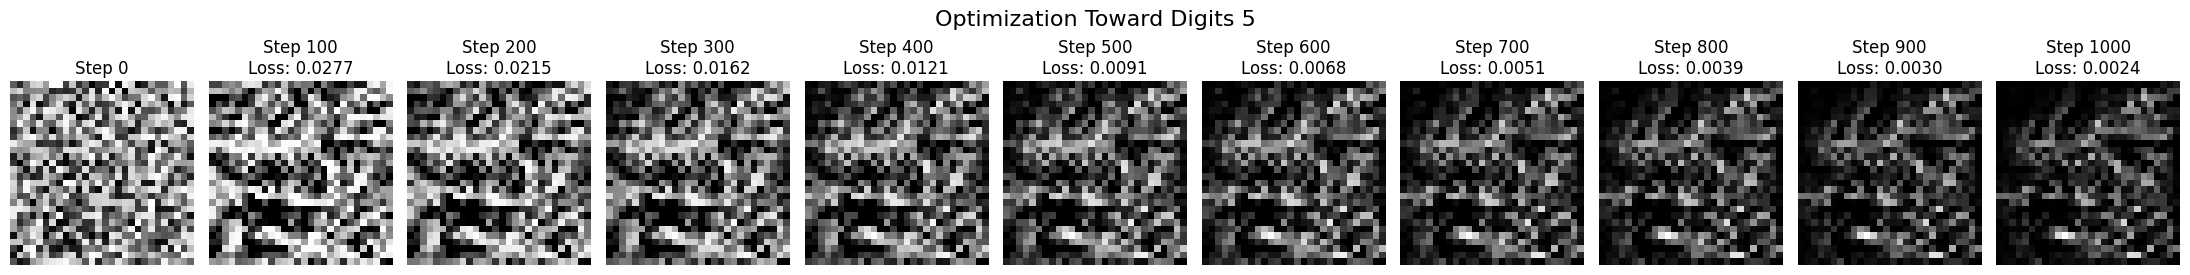

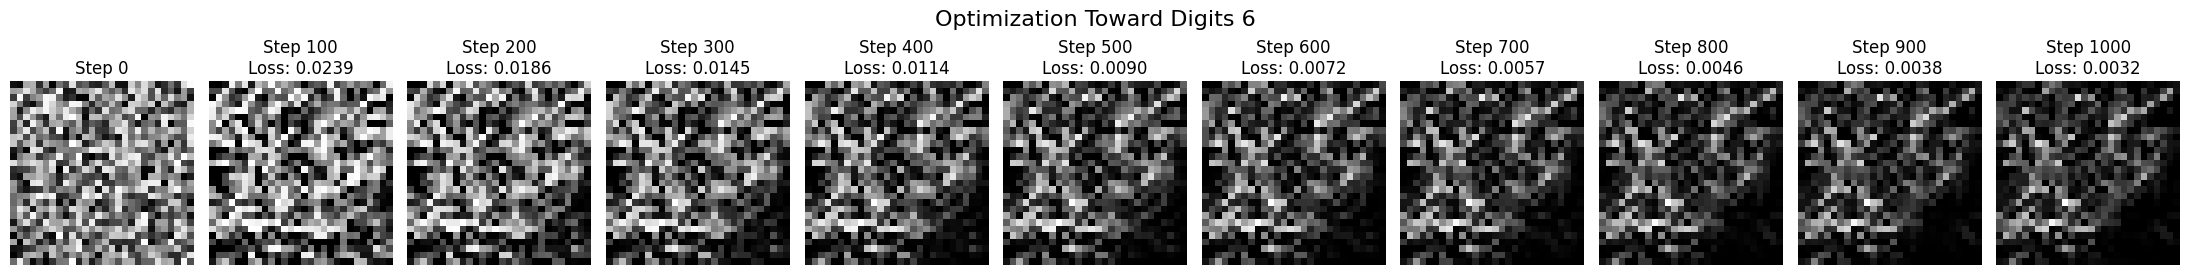

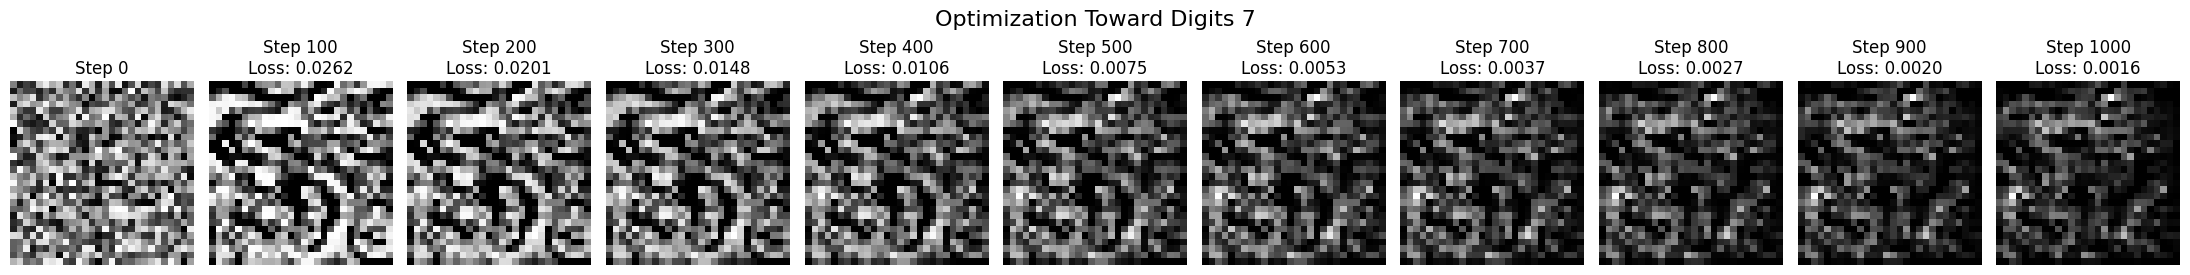

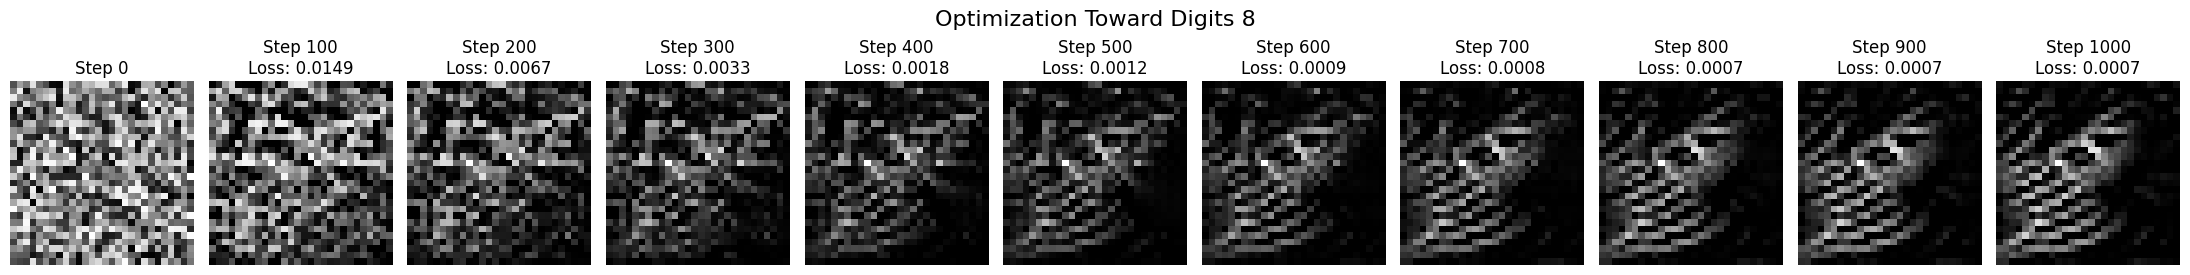

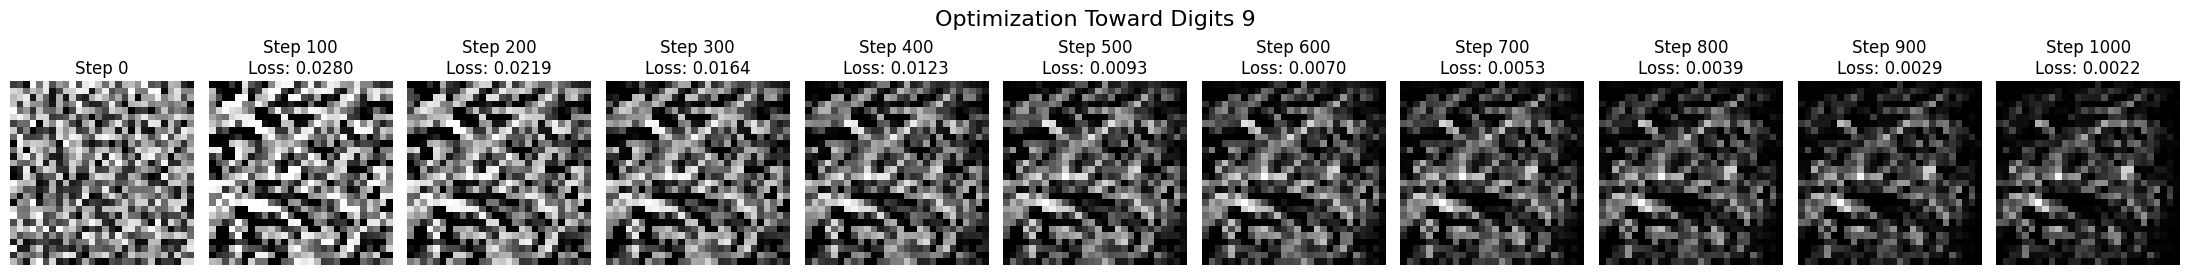

In [12]:
for digit in range(10):
    _ = optimize_input_image(model,
                             digits=digit,
                             sample_from_dataset=False,
                             steps=1000)

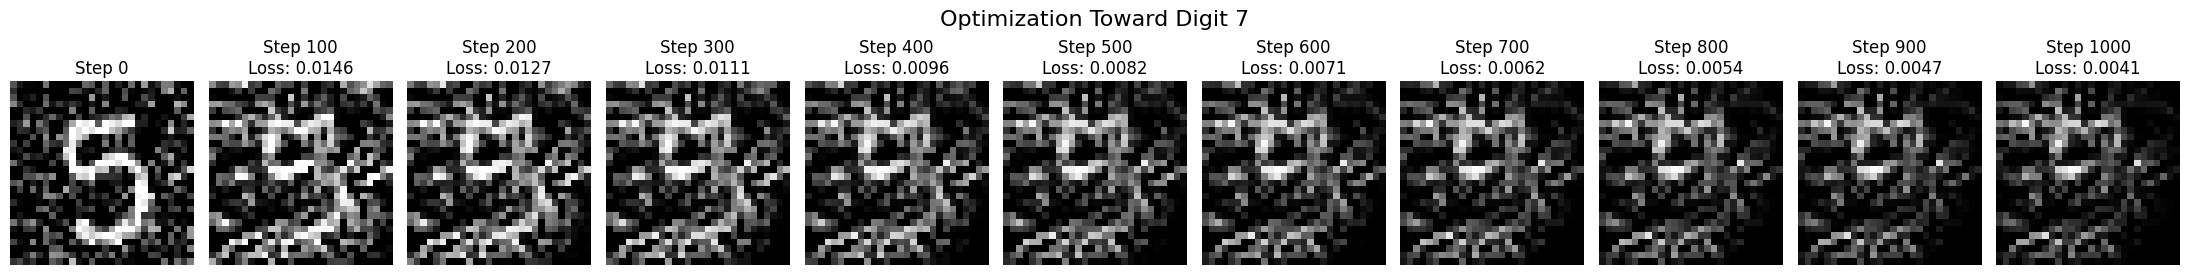

In [56]:
target_digit = 7
target_output = create_target_output(digits=target_digit)
initial_img = sample_random_image_from_dataset(x_train, y_train, target_digit=5, add_noise=True)

snapshots = optimize_with_snapshots(model, target_output, initial_img, steps=1000, snapshot_interval=100)
plot_snapshots(snapshots, main_title=f"Optimization Toward Digit {target_digit}")

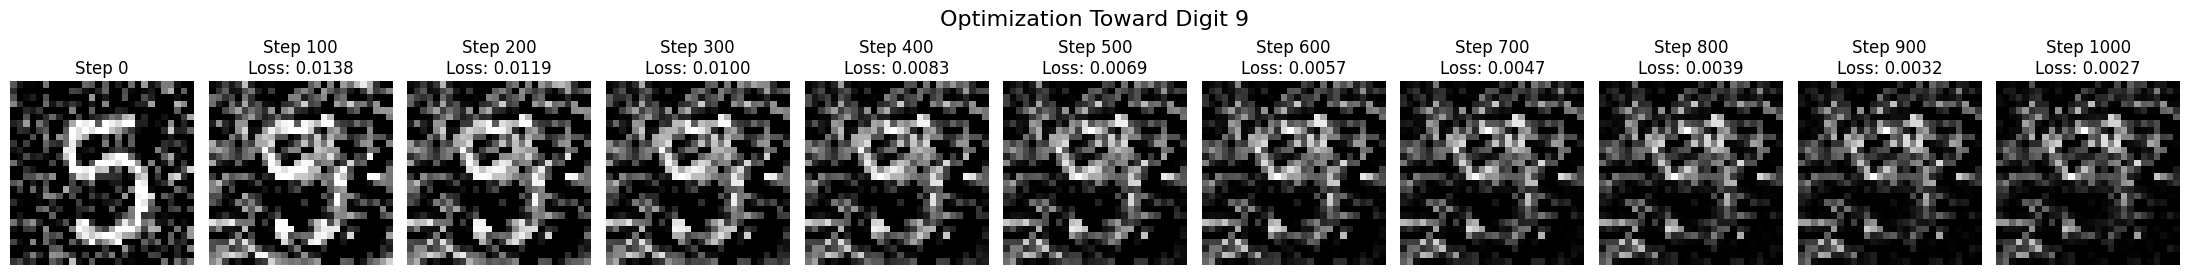

In [10]:
target_digit = 9
target_output = create_target_output(digits=target_digit)
initial_img = sample_random_image_from_dataset(x_train, y_train, target_digit=5, add_noise=True)

snapshots = optimize_with_snapshots(model, target_output, initial_img, steps=1000, snapshot_interval=100)
plot_snapshots(snapshots, main_title=f"Optimization Toward Digit {target_digit}")

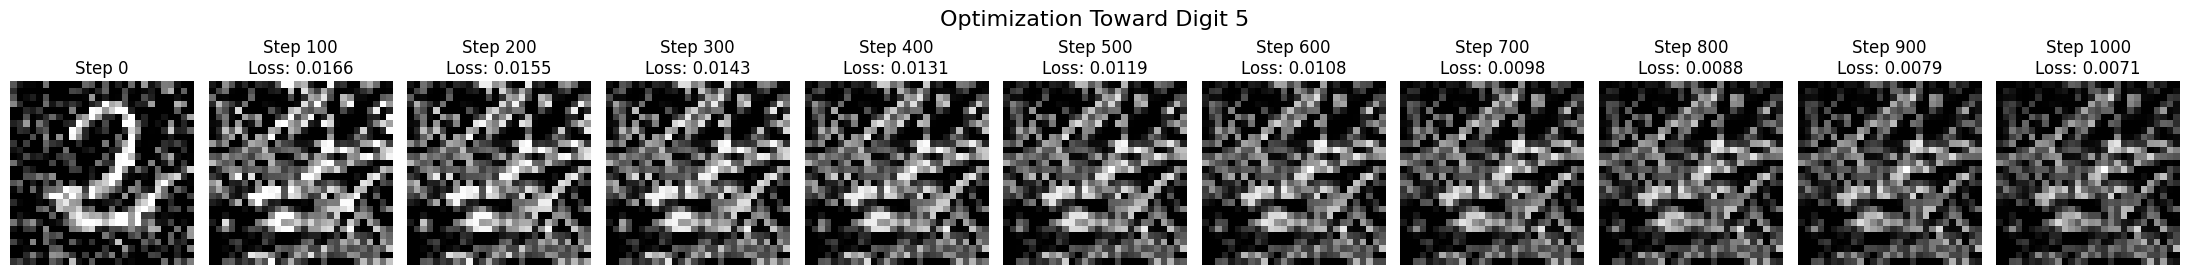

In [11]:
target_digit = 5
target_output = create_target_output(digits=target_digit)
initial_img = sample_random_image_from_dataset(x_train, y_train, target_digit=2, add_noise=True)

snapshots = optimize_with_snapshots(model, target_output, initial_img, steps=1000, snapshot_interval=100)
plot_snapshots(snapshots, main_title=f"Optimization Toward Digit {target_digit}")